<font color='DimGrey'> 
# Table of Contents </font>
<font color='Maroon'> 
* [Principal Components](#PC)
    * [The data](#exp)
    * [PCA by hand](#bh)
    * [PCA by prcomp](#bp)
    * [Relationship](#R)
    * [Plots](#p)
* [LOOCV](#cv)


<a id='exp'></a>
<font color='DimGrey'> 
# The data

In [1]:
#read the data
pro <- read.csv("protein.csv")

In [9]:
#display the first few rows
head(pro)

,Country,Red.Meat,White.Meat,Eggs,Milk,Fish,Cereal,Starch,Nuts,fruits.and.vegetables
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Albania,10.1,1.4,0.5,8.9,0.2,42.3,0.6,5.5,1.7
2,Austria,8.9,14.0,4.3,19.9,2.1,28.0,3.6,1.3,4.3
3,Belgium,13.5,9.3,4.1,17.5,4.5,26.6,5.7,2.1,4.0
4,Bulgaria,7.8,6.0,1.6,8.3,1.2,56.7,1.1,3.7,4.2
5,Czechoslovakia,9.7,11.4,2.8,12.5,2.0,34.3,5.0,1.1,4.0
6,Denmark,10.6,10.8,3.7,25.0,9.9,21.9,4.8,0.7,2.4


In [72]:
#the dimension of the data 
dim(pro)

[1] 25 10

<font color='Maroon'> 
There is nine variables beside the country variable

In [11]:
#structure of the data
str(pro)

'data.frame':	25 obs. of  10 variables:
 $ Country              : Factor w/ 25 levels "Albania","Austria",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ Red.Meat             : num  10.1 8.9 13.5 7.8 9.7 10.6 8.4 9.5 18 10.2 ...
 $ White.Meat           : num  1.4 14 9.3 6 11.4 10.8 11.6 4.9 9.9 3 ...
 $ Eggs                 : num  0.5 4.3 4.1 1.6 2.8 3.7 3.7 2.7 3.3 2.8 ...
 $ Milk                 : num  8.9 19.9 17.5 8.3 12.5 25 11.1 33.7 19.5 17.6 ...
 $ Fish                 : num  0.2 2.1 4.5 1.2 2 9.9 5.4 5.8 5.7 5.9 ...
 $ Cereal               : num  42.3 28 26.6 56.7 34.3 21.9 24.6 26.3 28.1 41.7 ...
 $ Starch               : num  0.6 3.6 5.7 1.1 5 4.8 6.5 5.1 4.8 2.2 ...
 $ Nuts                 : num  5.5 1.3 2.1 3.7 1.1 0.7 0.8 1 2.4 7.8 ...
 $ fruits.and.vegetables: num  1.7 4.3 4 4.2 4 2.4 3.6 1.4 6.5 6.5 ...


In [2]:
#assign only the numerical data to "Npro"
Npro <- pro[,2:10]

In [88]:
summary(Npro)

    Red.Meat        White.Meat          Eggs            Milk      
 Min.   : 4.400   Min.   : 1.400   Min.   :0.500   Min.   : 4.70  
 1st Qu.: 7.800   1st Qu.: 4.900   1st Qu.:2.700   1st Qu.: 9.70  
 Median : 9.500   Median : 7.800   Median :2.900   Median :17.50  
 Mean   : 9.828   Mean   : 7.896   Mean   :2.936   Mean   :16.31  
 3rd Qu.:10.600   3rd Qu.:10.800   3rd Qu.:3.700   3rd Qu.:20.60  
 Max.   :18.000   Max.   :14.000   Max.   :4.700   Max.   :33.70  
      Fish            Cereal          Starch           Nuts      
 Min.   : 0.200   Min.   :18.60   Min.   :0.600   Min.   :0.700  
 1st Qu.: 2.100   1st Qu.:24.30   1st Qu.:3.100   1st Qu.:1.500  
 Median : 3.400   Median :28.00   Median :4.700   Median :2.400  
 Mean   : 4.284   Mean   :32.25   Mean   :4.276   Mean   :3.072  
 3rd Qu.: 5.800   3rd Qu.:40.10   3rd Qu.:5.700   3rd Qu.:4.700  
 Max.   :14.200   Max.   :56.70   Max.   :6.500   Max.   :7.800  
 fruits.and.vegetables
 Min.   :1.400        
 1st Qu.:2.900        


<font color='DimGrey'> 
# Principal Components Analysis

<a id='bh'></a>
<font color='DimGrey'> 
### by hand:

In [116]:
#calculate the correlation matrix
cor <- cor(Npro)

In [117]:
#calculate the Eigenvalues & Eigenvectors
Eigenvalues <- eigen(cor)$values

In [121]:
Eigenvectors <- eigen(cor)$vectors

In [119]:
#now, the Principal Components can be estimated via a matrix
PC <- as.matrix(Npro) %*% Eigenvectors

In [19]:
#calculate the proportion of the variation explained by the various components
print(round(Eigenvalues/sum(Eigenvalues)*100,digits=2))

[1] 43.13 18.16 11.78 10.62  5.90  4.74  3.20  1.31  1.16


In [20]:
round(cumsum(Eigenvalues/sum(Eigenvalues))*100,digits=2)

[1]  43.13  61.29  73.07  83.69  89.59  94.33  97.52  98.84 100.00

<font color='Maroon'> 
### Thus,the first component explains 43.13 of the total variation in the data.
### and the  first five components explains 89.59 of the total variation in the data.
## This suggest that the effective dimension of the space of yield curves could be five and any of the yield curves from our data set can be described by a linear combination of the first three loadings, while the relative error being very small.

<a id='bp'></a>
<font color='DimGrey'> 
### by method:

In [4]:
pc <- prcomp(Npro, scale.= TRUE)
#set the scale to TRUE to estimate the PC by the cor matrix instead of cov

In [5]:
#Eigenvectors
pc$rotation

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
Red.Meat,-0.3097482,-0.06597175,-0.51511760,-0.46382164,0.2011695,-0.3320790,0.44948607,-0.044366706,0.25391992
White.Meat,-0.3242371,-0.26023489,0.60620736,-0.14196192,0.1179686,0.2453928,0.07085976,-0.108072325,0.59048506
Eggs,-0.4356002,-0.04921056,0.07864397,-0.32605111,0.1014603,-0.1834209,-0.57015331,0.536011473,-0.19752481
Milk,-0.3375943,-0.19182069,-0.36708729,-0.01350964,-0.7150679,0.4303987,-0.10237969,-0.046233269,0.07151918
Fish,-0.1300092,0.66708007,-0.21250506,0.28338151,0.1751990,0.2750701,-0.02442142,0.351425146,0.42683018
Cereal,0.4385563,-0.24052196,0.08082681,-0.04959222,-0.3268877,-0.1435739,0.27057136,0.688045876,0.25834115
Starch,-0.3143399,0.33404488,0.28189810,0.24125906,-0.4714638,-0.6337001,0.09750212,-0.118457894,0.06737301
Nuts,0.4224730,0.14009678,-0.12626640,-0.33775943,-0.1396997,-0.1979712,-0.55720360,-0.293178898,0.46553895
fruits.and.vegetables,0.0931764,0.50462753,0.28129597,-0.63495877,-0.2113138,0.2712456,0.25218441,-0.003640526,-0.26931625


In [6]:
#Eigenvalues
pc$sdev^2

[1] 3.8815585 1.6345672 1.0602009 0.9553955 0.5312359 0.4264647 0.2876397
[8] 0.1183359 0.1046018

In [7]:
summary(pc)

Importance of components:
                          PC1    PC2    PC3    PC4     PC5     PC6     PC7
Standard deviation     1.9702 1.2785 1.0297 0.9774 0.72886 0.65304 0.53632
Proportion of Variance 0.4313 0.1816 0.1178 0.1062 0.05903 0.04738 0.03196
Cumulative Proportion  0.4313 0.6129 0.7307 0.8369 0.89588 0.94327 0.97523
                           PC8     PC9
Standard deviation     0.34400 0.32342
Proportion of Variance 0.01315 0.01162
Cumulative Proportion  0.98838 1.00000

<font color='Maroon'> 
The cumulative proportion determine the amount of variance that the principal components explain

<a id='R'></a>
<font color='DimGrey'> 
# Relationship

<font color='DimGrey'> 
## × PC vs variables

In [8]:
#cor between each pc with the variables
vectors <- pc$rotation
values  <- (pc$sdev)^2 
A <- cor(pro[ ,2:10])
corr.y.x <- matrix ( , nrow=nrow(A) , ncol= nrow(A))
for (i in 1:nrow(A) ){
 for (j in 1:nrow(A) ){
corr.y.x[i,j] <- vectors[j,i]*sqrt(values[i])/sqrt(A[j,j])
  }
 }
#add col,row names to the matrix
rownames(corr.y.x) <- c("PC1", "PC2","PC3","PC4","PC5","PC6","PC7","PC8","PC9")
colnames(corr.y.x) <-  c("Red.Meat", "White.Meat","Eggs","milk","fish","Cereal","Starch","Nuts","fruits.and.vegetables")
corr.y.x

,Red.Meat,White.Meat,Eggs,milk,fish,Cereal,Starch,Nuts,fruits.and.vegetables
PC1,-0.61025570,-0.63880119,-0.85820521,-0.66511722,-0.25613982,0.86402929,-0.61930221,0.8323424,0.18357307
PC2,-0.08434501,-0.33271081,-0.06291580,-0.24524313,0.85286317,-0.30750779,0.42707702,0.1791140,0.64516728
PC3,-0.53039628,0.62418782,0.08097659,-0.37797531,-0.21880808,0.08322418,0.29025936,-0.1300115,0.28963937
PC4,-0.45335938,-0.13875974,-0.31869649,-0.01320491,0.27698938,-0.04847359,0.23581706,-0.3301407,-0.62063623
PC5,0.14662429,0.08598251,0.07395029,-0.52118390,0.12769545,-0.23825510,-0.34363077,-0.1018214,-0.15401801
PC6,-0.21686177,0.16025198,-0.11978167,0.28106871,0.17963251,-0.09375990,-0.41383315,-0.1292836,0.17713493
PC7,0.24106861,0.03800354,-0.30578493,-0.05490833,-0.01309771,0.14511298,0.05229239,-0.2988397,0.13525168
PC8,-0.01526214,-0.03717686,0.18438787,-0.01590424,0.12089020,0.23668768,-0.04074950,-0.1008535,-0.00125234
PC9,0.08212328,0.19097583,-0.06388386,0.02313087,0.13804625,0.08355320,0.02178991,0.1505655,-0.08710279


<font color='Maroon'>  
>### by noticing the values next to PC1, I can conclude that : 
>>#### Red.Meat,White.Meat,Eggs,milk,fish,Starch : has a Negative relationship 
>>#### but Cereal,Nuts,fruits.and.vegetables : has a Positive relationship




<font color='Maroon'> 
>### also if we look at the values next to PC2, we can conclude that : 
>>#### Red.Meat,White.Meat,Eggs,milk,Cereal : has a Negative relationship 
>>#### but Starch,Nuts,fruits.and.vegetables : has a Positive relationship

<font color='Maroon'> 
## and if we plot the PCs VS the variables it will become clearer and easy to detect

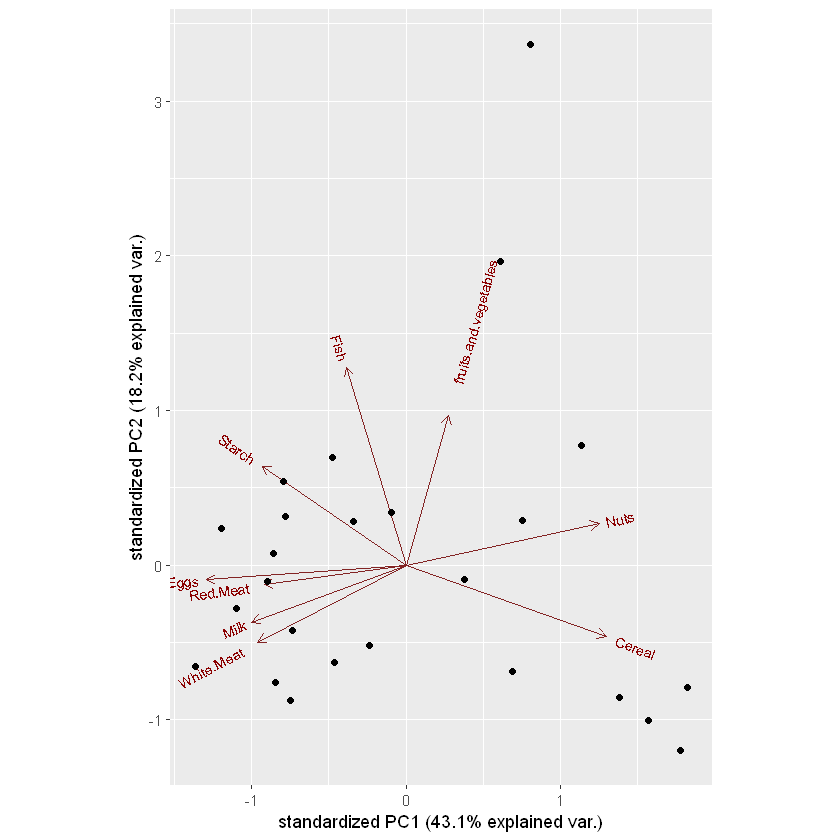

In [12]:
# plot PC vs variables
ggbiplot(pc)

<font color='Maroon'> 
>### if we look at the x-axis(PC1): 
>>#### any vector pointing to the right = positive relationship
>>#### any vector pointing to the left = negative relationship

<font color='Maroon'> 
>### and if we look at the y-axis(PC2): 
>>#### any vector pointing UP = positive relationship
>>#### any vector pointing DOWN = negative relationship

<font color='DimGrey'> 
## × Variables vs Variables

In [134]:
# corr between the variables 
cor(Npro)

,Red.Meat,White.Meat,Eggs,Milk,Fish,Cereal,Starch,Nuts,fruits.and.vegetables
Red.Meat,1.00000000,0.1530027,0.58560895,0.48457425,0.06095745,-0.49987746,0.13542594,-0.3494486,-0.07422123
White.Meat,0.15300271,1.0000000,0.62040916,0.27552855,-0.23400923,-0.41379691,0.31377205,-0.6349618,-0.06131670
Eggs,0.58560895,0.6204092,1.00000000,0.50000926,0.06557136,-0.71243682,0.45223071,-0.5597810,-0.04551755
Milk,0.48457425,0.2755285,0.50000926,1.00000000,0.02617651,-0.44206103,0.25540615,-0.5058055,-0.26096403
Fish,0.06095745,-0.2340092,0.06557136,0.02617651,1.00000000,-0.52423080,0.40385286,-0.1471529,0.26613865
Cereal,-0.49987746,-0.4137969,-0.71243682,-0.44206103,-0.52423080,1.00000000,-0.53326231,0.6509973,0.04654808
Starch,0.13542594,0.3137721,0.45223071,0.25540615,0.40385286,-0.53326231,1.00000000,-0.4743116,0.08440956
Nuts,-0.34944855,-0.6349618,-0.55978097,-0.50580550,-0.14715294,0.65099727,-0.47431155,1.0000000,0.37496971
fruits.and.vegetables,-0.07422123,-0.0613167,-0.04551755,-0.26096403,0.26613865,0.04654808,0.08440956,0.3749697,1.00000000


<font color='Maroon'> 
#### we can see that the "White.Meat" and the "Eggs" has a strong positive correlation 
#### and the "Cereal","Eggs" has a strong negative correlation

<font color='Maroon'> 
### but this matrix shows the correlation in general, if we want to see the correlation for just the first two components, plot pc1 vs pc2 plot of the variables, and it will become clearer and easier to detect.

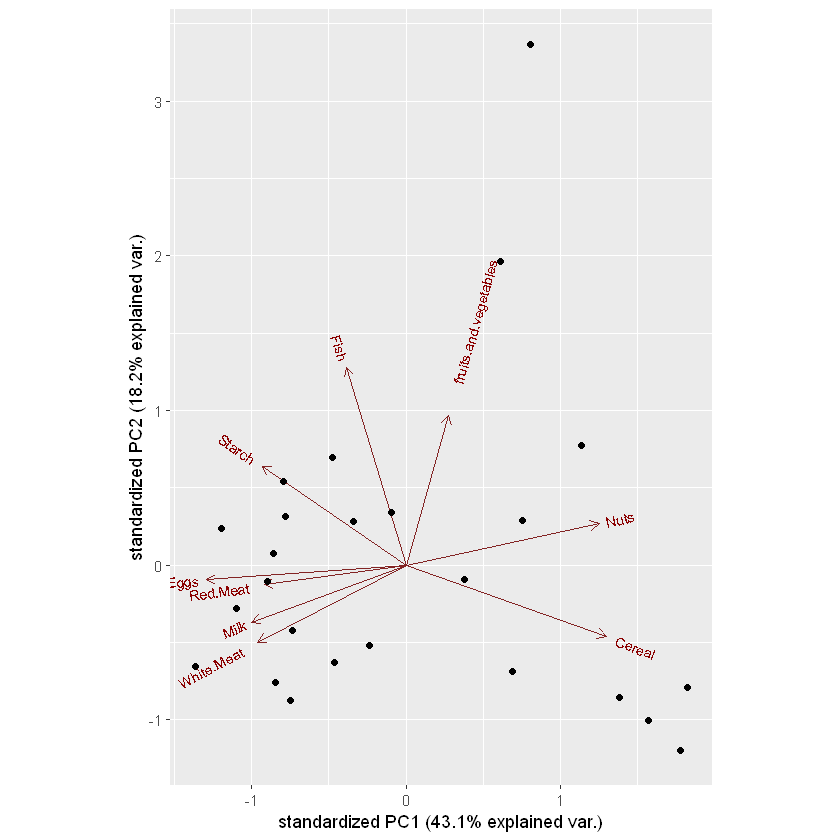

In [13]:
ggbiplot(pc)

<font color='Maroon'> 
>## Detecting correlation between variable by the pc plot: 
>>### Acute angle = positive correlation
>>### Abtuse angle = negative correlation 
>>### Orthogonal angle = no correlation

<font color='DimGrey'> 
## × PCs vs PCs

In [122]:
#corr between pc vs pc 
cor(pc$rotation)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
PC1,1.00000000,0.09119969,0.011280906,-0.17197639,-0.14627747,-0.028182122,-0.011873344,0.10606206,0.20952881
PC2,0.09119969,1.00000000,-0.010470768,0.15962590,0.13577255,0.026158222,0.011020660,-0.09844521,-0.19448149
PC3,0.01128091,-0.01047077,1.000000000,0.01974486,0.01679433,0.003235630,0.001363196,-0.01217714,-0.02405630
PC4,-0.17197639,0.15962590,0.019744857,1.00000000,-0.25602798,-0.049326884,-0.020781795,0.18563936,0.36673617
PC5,-0.14627747,0.13577255,0.016794327,-0.25602798,1.00000000,-0.041955828,-0.017676312,0.15789874,0.31193374
PC6,-0.02818212,0.02615822,0.003235630,-0.04932688,-0.04195583,1.000000000,-0.003405555,0.03042110,0.06009780
PC7,-0.01187334,0.01102066,0.001363196,-0.02078179,-0.01767631,-0.003405555,1.000000000,0.01281664,0.02531967
PC8,0.10606206,-0.09844521,-0.012177138,0.18563936,0.15789874,0.030421101,0.012816643,1.00000000,-0.22617520
PC9,0.20952881,-0.19448149,-0.024056305,0.36673617,0.31193374,0.060097804,0.025319666,-0.22617520,1.00000000


<font color='Maroon'> 
### All the correlation between  the PCs are very week which is good.

<a id='p'></a>
<font color='DimGrey'> 
# plots

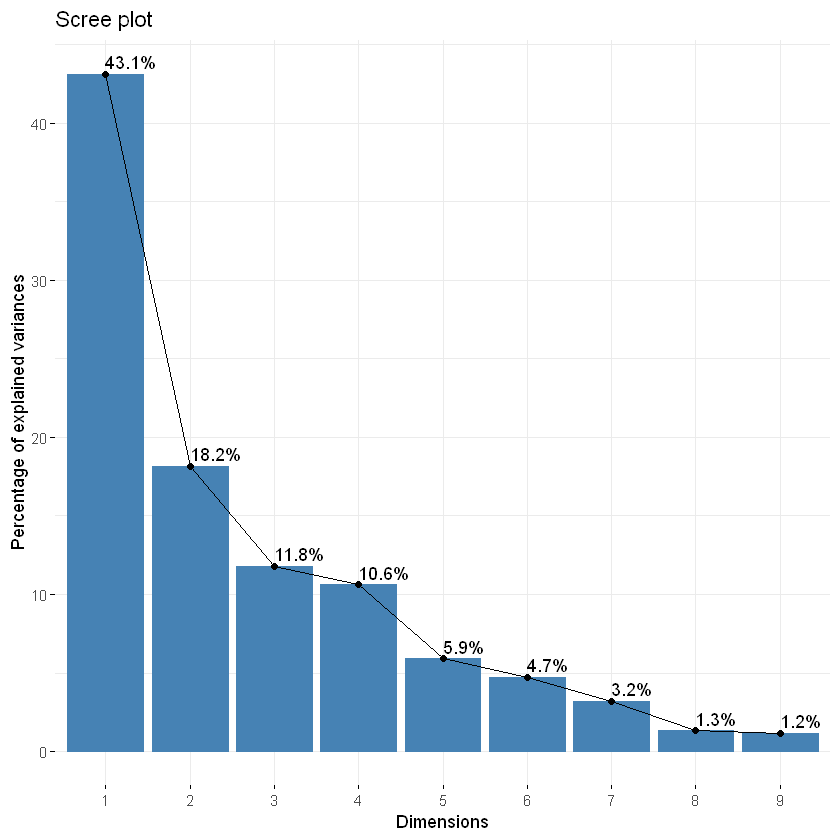

In [25]:
# bar plot the percentage of variation
fviz_eig(pc,addlabels = TRUE)

<font color='Maroon'> 
### × Principal components are created in order of the amount of variation they captures from the data
 ### × PC1 captures the most variation
 ### × The first three or four PCs have coverd most of the information

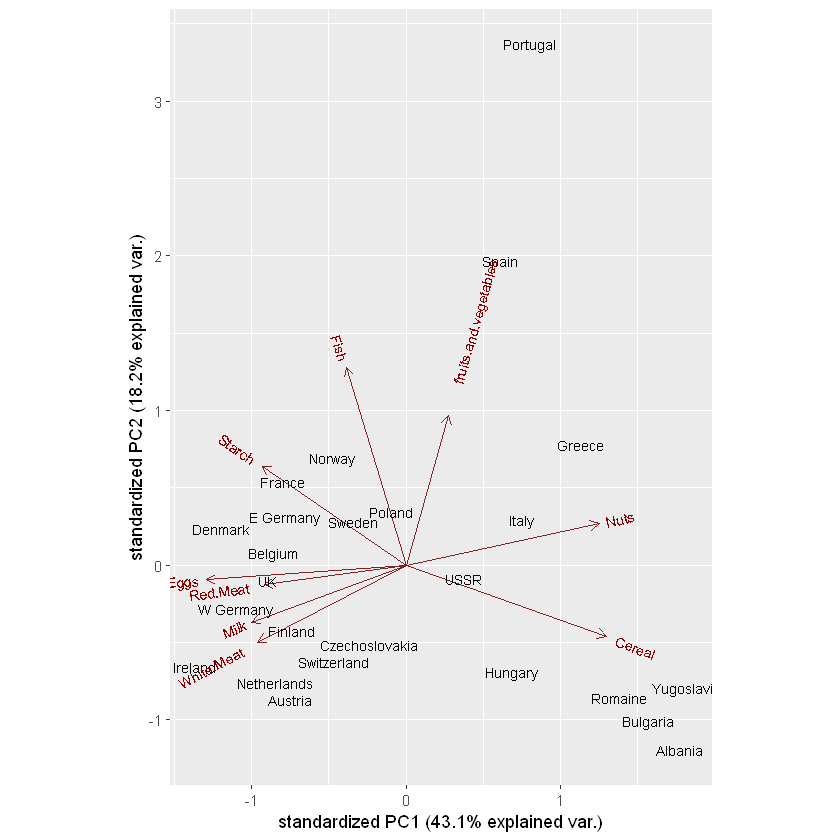

In [35]:
# plot the PC1 and PC2 with the Country names 
ggbiplot(pc, labels=pro$Country)

<font color='Maroon'> 
### Now we can see the countries that has similarity of the protein sources,There is some countries are kinda clustered together,like Romaine Yogoslavia,Bulgaria,Albania... they must rely on cereal as the most source of protein.
### Also Spain and portugal, it clearly depends on vegetables and fruits as the most source of protein.

<font color='Maroon'> 
## But what makes it clustered this way ?
### Perhaps because of the different economic status of the countries and the peoples, therefore the quantities of their consumption differ  for the type of the protein source

<font color='Maroon'> 
## So I tried to classify countries according to their wealth and poverty

In [15]:
#add new column to the main dataset
pro$type<- c("poor","rich","rich","mid","mid","rich","rich","rich","rich","poor","mid","rich","mid","rich","rich","mid","mid","mid","poor","rich","rich","rich","rich","rich","mid")

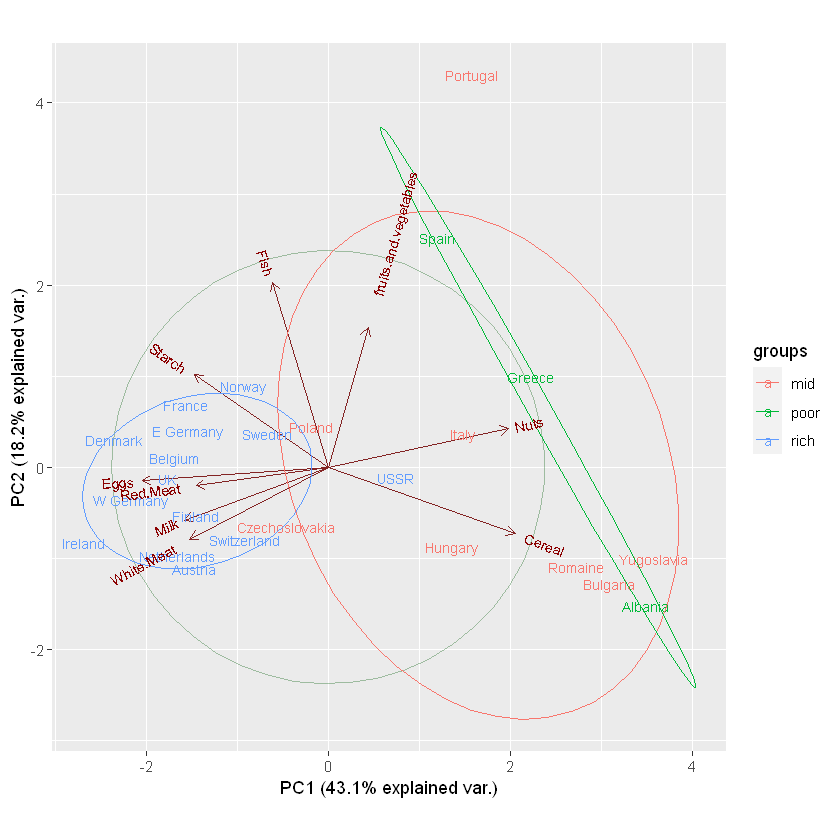

In [39]:
#plot the first two Principal Components and assign "group" to the new column that i just made
ggbiplot(pc,ellipse=TRUE,labels=pro$Country, group=pro$type, obs.scale = 1, var.scale = 1,circle=TRUE )

<font color='Maroon'> 
## this plot shows me that the first two components helped to separate the groups very well 

### it does make sense that rich countries tend to consume protein from sources that have high price like:white meat, red meat, milk and eggs
### and the middle income countries tend to consume protein from sources that have low price like:cereal, nuts, fruits and vegetables
 

<font color='Maroon'> 
# Would other PCs provide better separation? Try PC3 and 4

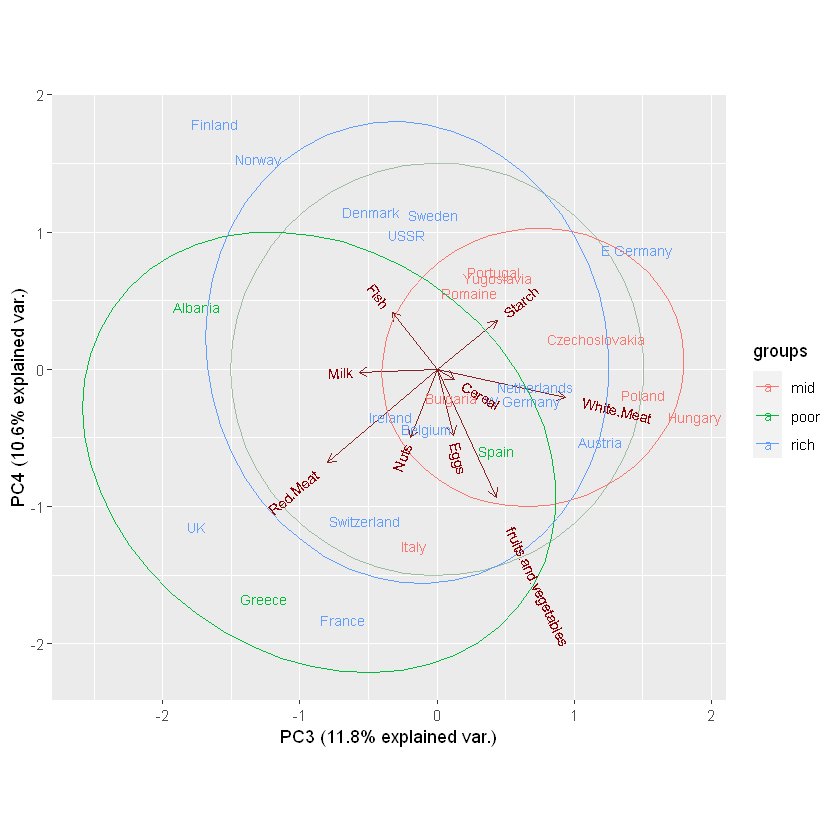

In [16]:
ggbiplot(pc,ellipse=TRUE,choices=c(3,4),labels=pro$Country, group=pro$type, obs.scale = 1, var.scale = 1,circle=TRUE )

<font color='Maroon'> 
### we don't see much here.. because pc3 and pc4 explain very smaal percentages of total variation, so they are not informative and will not separate the groups better than pc1 and pc2

<a id='cv'></a>
<font color='DimGrey'> 
# LOOCV

<font color='DimGrey'> 
## Oil data

In [17]:
oil0 <- read.csv("oil.csv",sep=";")

#### The table below shows data percentages of different types of residuals during the analysis of crude oil obtained from 2 different fields

In [18]:
head(oil0)

,x1,x2,x3,x4,x5,population
,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<int>
1,3.9,51,0.20,7.06,12.19,1
2,2.7,49,0.07,7.14,12.23,1
3,2.8,36,0.30,7.00,11.30,1
4,3.1,45,0.08,7.20,13.01,1
5,3.5,46,0.10,7.81,12.63,1
6,3.9,43,0.07,6.25,10.42,1


<font color='Maroon'> 
##### Estimated Fisher function using 17 samples then classify the 18th one using this function. Repeat the process until you exhaust all the 18 samples.

In [19]:
i=1
yhat <- vector(mode = "numeric")
mhat <- vector(mode = "numeric")
group <- vector(mode = "numeric")
# start a while loop with a condition (i<19), were i=counter,19=number of rows,we should stop the loop before
while (i < 19){
  oil1<- oil0[-i,]
  # choose the X0 to be changing over the counter i  
  X0=t(as.matrix(oil0[i,1:5]))
  #define the two groupes
  x1=oil1[oil1[1:17,6]==1,][,1:5]
  x2=oil1[oil1[1:17,6]==2,][,1:5]
  #number of each group
  n1=nrow(x1)
  n2=nrow(x2)
  #calculate X bar 1,2
  xbar1=colMeans(x1)
  xbar2=colMeans(x2)
  #calculate S 1,2  
  s1=cov(x1)
  s2=cov(x2)
  #calculate y hat  
  spooled=(((n1-1)*s1)+((n2-1)*s2))/(n1+n2-2)
  inv.spooled <-solve(spooled)
  yhat[i]=(xbar1-xbar2)%*%(inv.spooled)%*%(X0)
  #calculate m hat
  mhat[i]=((xbar1-xbar2)%*%inv.spooled%*%(xbar1+xbar2))/(2)
  #decide which group
  group[i] <-ifelse(yhat[i] >= mhat[i],"1","2")
  #increase the counter  
  i <- i+1 }

In [20]:
#table shows the m hat,y hat,and the classification results
cbind(group,mhat,yhat,oil0[6])

group,mhat,yhat,population
<fct>,<dbl>,<dbl>,<int>
1,4.391099,8.8412317,1
1,4.356570,9.6568176,1
1,5.675917,8.0518773,1
1,4.361202,9.4968318,1
1,3.750678,7.7149945,1
1,5.421248,7.6966930,1
1,8.287336,9.4273148,1
2,6.320771,4.5608329,2
2,3.930731,0.8506008,2


<font color='Maroon'> 
### most of the predicted observations were classified in the same group that they were actually in. which is very good